In [1]:
import pandas as pd

In [2]:
# 영화 리뷰를 load한다. 사랑/장르라는 단어를 포함하고 있는 document를 load 한다.
reviews = pd.read_csv('/home/skkucman/dses/machine-learning-lecture-notes/inputs/ratings_train.txt', delimiter='\t')

In [3]:
reviews.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [4]:
neg = reviews[(reviews.document.str.len() >= 30) & (reviews.label == 0)].sample(3000, random_state=43)
pos = reviews[(reviews.document.str.len() >= 30) & (reviews.label == 1)].sample(3000, random_state=43)

In [5]:
import re
import konlpy
from konlpy.tag import Twitter

okt = Twitter()

/home/skkucman/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
def parse(s):
    s = re.sub(r'[?$.!,-_\'\"(){}~]+', '', s)
    try:
        return okt.nouns(s)
    except:
        return []

In [7]:
neg['parsed_doc'] = neg.document.apply(parse)
pos['parsed_doc'] = pos.document.apply(parse)

In [8]:
neg.head()

,id,document,label,parsed_doc
149713,6674102,정말 댓글에 속아서 보게된 시간 아까운 영화. 전체적으로 코믹적인 요소를 많이 넣으...,0,"[정말, 댓글, 속, 시간, 영화, 전체, 코믹, 요소, 정말, 웃기, 스토리]"
52541,8514375,점수를 줘야 하는거임? 30년후 구구절절 설명하며 끝나는모습 이라니...,0,"[점수, 임, 년후, 절절, 설명, 모습]"
72078,1173600,주제는 좋으나 영화 자체는 주제를 포함하기엔 좀 조잡하다,0,"[주제, 영화, 자체, 주제, 포함, 좀]"
19403,8384839,"이걸 영화라고 만들다니...말그대로 '돈만 떡으로 바르고 여운의 감동, 의미는 없는...",0,"[걸, 영화, 그대로, 돈, 떡, 여운, 감동, 의미, 영화, 이건, 그냥, 영화,..."
106111,8997490,"과장되고 어설픈 연기에 인류의 보편적 정서와는 거리가 먼 일본식 정서간의 괴리감, ...",0,"[과장, 연기, 인류, 보편, 정서, 거리, 일본, 정서, 괴리감, 무엇, 공포영화..."


In [9]:
pos.head()

,id,document,label,parsed_doc
148005,8918849,마지막에 눈물이 흐를뻔... 너무 감동적이고 재미있는 영화,1,"[마지막, 눈물, 뻔, 감동, 영화]"
41010,9304354,오! 평점 높네요. 저도 진짜 좋아하는 영화에요. 소소한 일상의 반전. 아즈키판다 짱!,1,"[오, 평점, 저, 진짜, 영화, 일상, 반전, 키, 판다, 짱]"
97924,9324301,전 아프리카 구호 활동중 에볼라에 걸려 눈을 감는 순간 누군가 틀어준 이 영화를 보...,1,"[전, 아프리카, 구호, 활동, 에볼라, 눈, 순간, 누군가, 이, 영화, 보고, ..."
68271,10274621,전작을 본적이 없는데도 너무 재미있게 봤습니다. 크리스 에반스와 사무엘 L.잭슨의 ...,1,"[전작, 본적, 크리스, 에반스, 사무엘, 잭슨, 카리스마, 그, 외, 스토리, 액..."
41106,9908746,신선하고 환경파괴에대해서 자연과 인간의 공존 전쟁 등등 많은 교훈을 주는 애니메이션...,1,"[환경, 파괴, 대해, 자연, 인간, 공존, 전쟁, 등등, 교훈, 애니메이션, 원작..."


In [10]:
# 학습 데이터 : 5,800개 / 테스트 데이터 : 200개
neg_train = neg[:2900]
pos_train = pos[:2900]
neg_test = neg[2900:]
pos_test = pos[2900:]

In [11]:
neg_corpus = set(neg_train.parsed_doc.sum())
pos_corpus = set(pos_train.parsed_doc.sum())

In [12]:
corpus = list((neg_corpus).union(pos_corpus))
print('corpus 길이', len(corpus))

corpus 길이 9836


In [13]:
corpus[:10]

['유명인', '폴더', '어딧어', '봤네옄', '유래', '아아', '레코드', '스터리', '행군', '명연기']

In [14]:
import numpy as np

In [15]:
neg_words_likelihood_cnts = {}
for w in corpus:
    cnt = 0
    for _, doc in neg_train.parsed_doc.items():
        if w in doc:
            cnt += 1
    neg_words_likelihood_cnts[w] = cnt

In [16]:
pos_words_likelihood_cnts = {}
for w in corpus:
    cnt = 0
    for _, doc in pos_train.parsed_doc.items():
        if w in doc:
            cnt += 1
    pos_words_likelihood_cnts[w] = cnt

In [17]:
import operator

In [18]:
sorted(neg_words_likelihood_cnts.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('영화', 1052),
 ('진짜', 254),
 ('스토리', 228),
 ('이', 199),
 ('점', 189),
 ('감독', 186),
 ('평점', 186),
 ('정말', 185),
 ('것', 184),
 ('왜', 173)]

In [19]:
sorted(pos_words_likelihood_cnts.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('영화', 1135),
 ('정말', 319),
 ('이', 249),
 ('최고', 221),
 ('것', 212),
 ('연기', 209),
 ('생각', 196),
 ('때', 188),
 ('진짜', 185),
 ('감동', 182)]

In [22]:
test_data = pd.concat([neg_test, pos_test], axis=0)

In [20]:
def predict(doc):
    pos_prior, neg_prior = 1/2, 1/2

    # Posterior of pos
    pos_prob = np.log(1)
    for word in corpus:
        if word in doc:
            # 단어가 현재 문장에 존재하고, pos 문장에 나온적이 있는 경우
            if word in pos_words_likelihood_cnts:
                pos_prob += np.log((pos_words_likelihood_cnts[word] + 1) / (len(pos_train) + len(corpus)))
            else:
                # 단어가 현재 문장에 존재하고, pos 문장에서 한 번도 나온적이 없는 경우 : 라플라시안 스무딩
                pos_prob += np.log(1 / (len(pos_train) + len(corpus)))
        else:
            # 단어가 현재 문장에 존재하지 않고, pos 문장에 나온적이 있는 경우 (pos에서 해당단어가 없는 확률을 구할 수 있다.)
            if word in pos_words_likelihood_cnts:
                pos_prob += \
                    np.log((len(pos_train) - pos_words_likelihood_cnts[word] + 1) / (len(pos_train) + len(corpus)))
            else:
                # 단어가 현재 문장에 존재하지 않고, pos 문장에서 단 한 번도 나온적이 없는 경우 : 라플라시안 스무딩
                pos_prob += np.log((len(pos_train) + 1) / (len(pos_train) + len(corpus)))
    pos_prob += np.log(pos_prior)
    
    # Posterior of neg
    neg_prob = 1
    for word in corpus:
        if word in doc:
            # 단어가 현재 문장에 존재하고, neg 문장에 나온적이 있는 경우
            if word in neg_words_likelihood_cnts:
                neg_prob += np.log((neg_words_likelihood_cnts[word] + 1) / (len(neg_train) + len(corpus)))
            else:
                # 단어가 현재 문장에 존재하고, neg 문장에서 한 번도 나온적이 없는 경우 : 라플라시안 스무딩
                neg_prob += np.log(1 / (len(neg_train) + len(corpus)))
        else:
            # 단어가 현재 문장에 존재하지 않고, neg 문장에 나온적이 있는 경우 (neg에서 해당단어가 없는 확률을 구할 수 있다.)
            if word in neg_words_likelihood_cnts:
                neg_prob += \
                    np.log((len(neg_train) - neg_words_likelihood_cnts[word] + 1) / (len(neg_train) + len(corpus)))
            else:
                # 단어가 현재 문장에 존재하지 않고, pos 문장에서 단 한 번도 나온적이 없는 경우 : 라플라시안 스무딩
                neg_prob += np.log((len(neg_train) + 1) / (len(neg_train) + len(corpus)))
    neg_prob += np.log(neg_prior)
    
    if pos_prob >= neg_prob:
        return 1
    else:
        return 0

In [23]:
test_data['pred'] = test_data.parsed_doc.apply(predict)

In [24]:
test_data.head()

,id,document,label,parsed_doc,pred
91417,5079332,쉴새없이 떠드는 폴도 싫지만...영화를 이렇게 만든 감독은 더 싫다.,0,"[새, 폴, 영화, 감독, 더]",0
122641,2776735,별표 반개도 아깝다..2시간 동안 본 짜증이 확밀려오네..,0,"[별표, 반개, 시간, 동안, 짜증, 확]",0
72606,8477996,내용은 봐줄만해. 하지만 15금과 19금 사이에 서있다. 포스터는 호러 귀신나올것같...,0,"[내용, 만해, 금, 금, 사이, 포스터, 호러, 귀신, 막상, 차마, 두, 최악,...",0
138243,7923759,진정한 수면제...졸다가 비명지르는 소리에 깼다가 다시 자다,0,"[수면제, 비명, 소리, 다시]",0
118247,8142893,"""진짜 슈스케 버스커 버스커, 허각, 울랄라세션 나올땐 재밌는데 갈수록 재미가 없어...",0,"[진짜, 슈스케, 버스커, 버스커, 허각, 울랄라세션, 땐, 갈수록, 재미, 제, ...",1


In [25]:
sum(test_data.label ^ test_data.pred)

46

In [26]:
1 - sum(test_data.label ^ test_data.pred)/len(test_data)

0.77

In [27]:
import pandas as pd

In [28]:
# 영화 리뷰를 load한다. 사랑/장르라는 단어를 포함하고 있는 document를 load 한다.
reviews = pd.read_csv('/home/skkucman/dses/machine-learning-lecture-notes/inputs/ratings_train.txt', delimiter='\t')

In [29]:
# 데이터 확인
reviews.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [30]:
# Test set 로드
test_reviews = pd.read_csv('/home/skkucman/dses/machine-learning-lecture-notes/inputs/ratings_test.txt', delimiter='\t')

In [31]:
test_reviews.head(10)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [32]:
# 데이터의 크기
print('Train set', reviews.shape)
print('Test set', test_reviews.shape)

Train set (150000, 3)
Test set (50000, 3)


In [33]:
# Pos VS Neg dataset 개수 비교
reviews.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [34]:
# Pos VS Neg dataset 개수 비교
test_reviews.label.value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [35]:
import seaborn as sns

In [36]:
reviews['length'] = reviews['document'].apply(lambda x: len(str(x)))

In [37]:
reviews.head()

,id,document,label,length
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


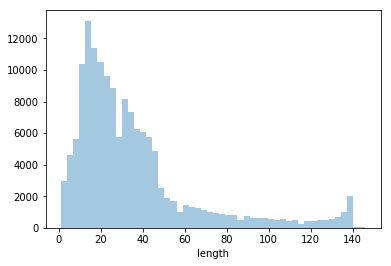

In [38]:
# 전체 분포
sns.distplot(reviews.length, kde=False)

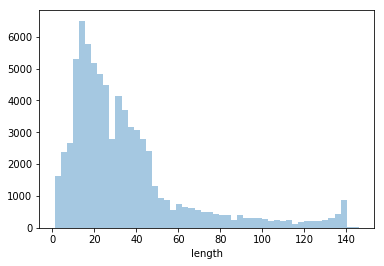

In [39]:
# Positive review에 대한 분포
sns.distplot(reviews[reviews.label==1]['length'], kde=False)

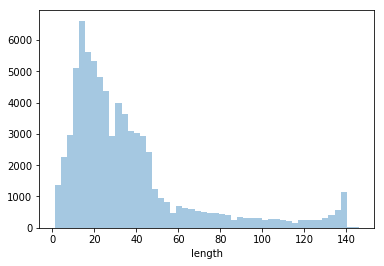

In [40]:
# Positive review에 대한 분포
sns.distplot(reviews[reviews.label==0]['length'], kde=False)

In [41]:
# 형태소 분석기
import konlpy
from konlpy.tag import Okt

okt = Okt()
def parse(s):
    try:
        return okt.nouns(s)
    except:
        return []

In [42]:
reviews['parsed_doc'] = reviews.document.apply(parse)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bow_transformer = CountVectorizer(analyzer=parse) \
    .fit(reviews.document)
# Corpus
len(bow_transformer.vocabulary_)
sample = reviews.document.iloc[3]
sample
sample_bow = bow_transformer.transform([sample])

In [45]:
print(sample_bow)

  (0, 2509)	1
  (0, 2630)	1
  (0, 26019)	1
  (0, 27667)	1
  (0, 29259)	1
  (0, 35255)	1


In [46]:
print(bow_transformer.get_feature_names()[2509])
print(bow_transformer.get_feature_names()[2630])
print(bow_transformer.get_feature_names()[26019])

교도소
구먼
이야기


In [47]:
reviews_bow = bow_transformer.transform(reviews.document)

In [48]:
from sklearn import datasets

In [49]:
iris = datasets.load_iris()

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [54]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 5)

In [56]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
from collections import Counter

In [58]:
# 각 그룹의 수를 확인합니다.
Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

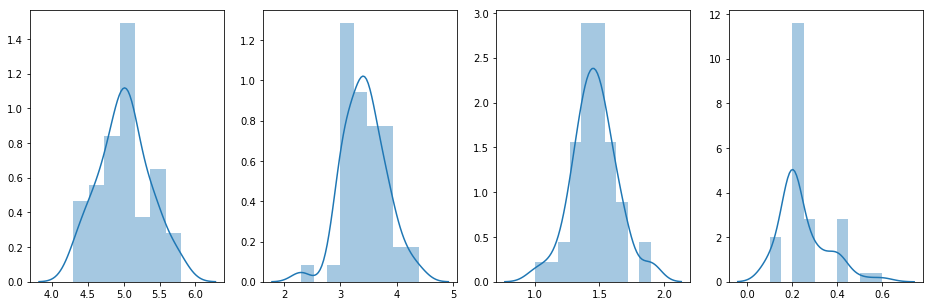

In [59]:
group_0 = iris.data[:50]
# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_0[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_0[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_0[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_0[:, 3])

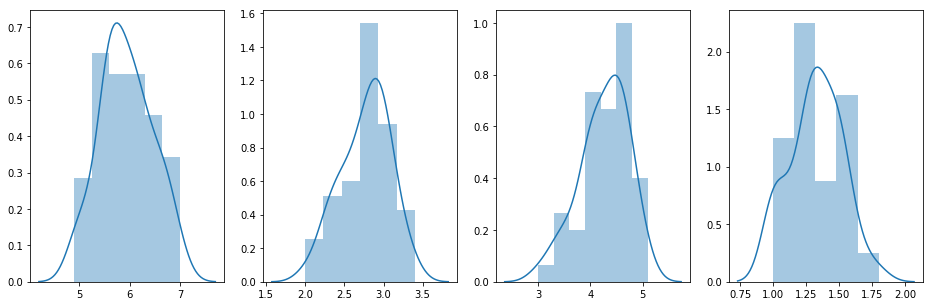

In [60]:
# Group 1
group_1 = iris.data[50:100]

# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_1[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_1[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_1[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_1[:, 3])

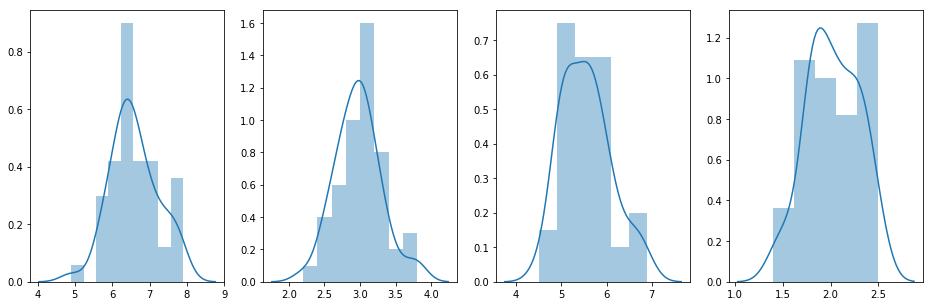

In [61]:
group_2 = iris.data[100:]

# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_2[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_2[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_2[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_2[:, 3])

In [64]:
# 검증 데이터를 사용하지 않습니다. (사용할 필요성이 없습니다.)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [65]:
print('Train x', train_x[:1])
print('Train y', train_y[:1])

Train x [[5.5 2.4 3.7 1. ]]
Train y [1]


In [66]:
# 카테고리의 비율이 적절하게, 그리고 원본 데이터와 비교하여 비율이 비슷하게 나누어졌는지 확인해봅니다.
from collections import Counter

In [67]:
print('원본 데이터의 비율 :', Counter(iris.target))
print('학습 데이터의 비율 :', Counter(train_y))
print('테스트 데이터의 비율 :', Counter(test_y))

원본 데이터의 비율 : Counter({0: 50, 1: 50, 2: 50})
학습 데이터의 비율 : Counter({1: 37, 2: 37, 0: 31})
테스트 데이터의 비율 : Counter({0: 19, 1: 13, 2: 13})


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
# 학습 셋으로만 scaling을 실시합니다.
scaler = scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
# 학습 셋에 이용했던 scaler를 테스트 셋에 이용합니다.
scaled_test_x = scaler.transform(test_x)

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [72]:
gnb_model = gnb.fit(scaled_train_x, train_y)

In [73]:
pred = gnb_model.predict(scaled_test_x)
print("Accuracy :", (pred == test_y).sum() / len(test_x))

Accuracy : 0.9777777777777777
